# Introduction to SciKit-Learn

Import required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
import itertools

Import sklearn and other data handling libraries

In [2]:
# Split and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate

# Classifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluate Models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import joblib

# Sample data provided by sklearn
from sklearn.datasets import load_iris
import random as rd

# Load, Prepare and preview the dataset - data foresights

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Data shape and unique values

In [6]:
print("Df shape:", df.shape)
print("Unique values in target:", df['target'].unique())

Df shape: (150, 5)
Unique values in target: [0. 1. 2.]


Null values

In [7]:
for attribute in df.columns:
    print(f"{attribute}: {df[attribute].isnull().sum()} null values")

sepal length (cm): 0 null values
sepal width (cm): 0 null values
petal length (cm): 0 null values
petal width (cm): 0 null values
target: 0 null values


Read data from external source

In [8]:
df_tennis = pd.read_csv("input/weather.nominal.csv")

In [9]:
df_tennis.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


# Model Training

Try 3 different modelling methods:
1. Full training: all sample data will be used for training. This method cannot use prediction.
2. Hold out: the dataset will be split into training and testing sets, allowing for model evaluation on unseen data.
3. Cross-validation: the dataset will be split randomly into k folds, with each fold used for testing once. This method provides a robust evaluation of the model's performance.

## 1. Full training


Naive Bayes Classifier

In [10]:
# Gaussian Naive Bayes Classifier
clf_gnb = GaussianNB()
clf_gnb.fit(iris.data, iris.target)

,priors,None
,var_smoothing,1e-09


Decision Tree Classifier

In [11]:
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)
clf_tree.fit(iris.data, iris.target)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,6
,min_impurity_decrease,0.0
,class_weight,None


Visualise the model

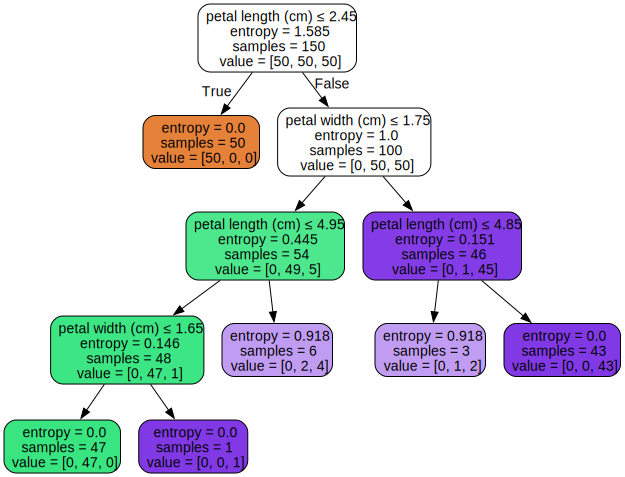

In [12]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, feature_names=iris.feature_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph
# graph.render("iris_tree", format='png', cleanup=True)

kNN

In [13]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(iris.data, iris.target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Neural Network (MLPClassifier)

In [14]:
clf_neural = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000, solver='lbfgs')
clf_neural.fit(iris.data, iris.target)

,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


## 2. Hold out

Split the dataset into training and testing sets

In [15]:
X_traning, X_test, y_training, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
class_names = iris.target_names

Confusion Matrix

In [16]:
# plotting confusion matrix
import itertools


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

Naive Bayes Classifier

In [17]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_traning, y_training)

pred_gnb = clf_gnb.predict(X_test)

print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, pred_gnb))
print("Recall Score:", recall_score(y_test, pred_gnb, average='micro'))
print("f1 Score:", f1_score(y_test, pred_gnb, average='micro'))

Naive Bayes Classifier Accuracy: 1.0
Recall Score: 1.0
f1 Score: 1.0


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


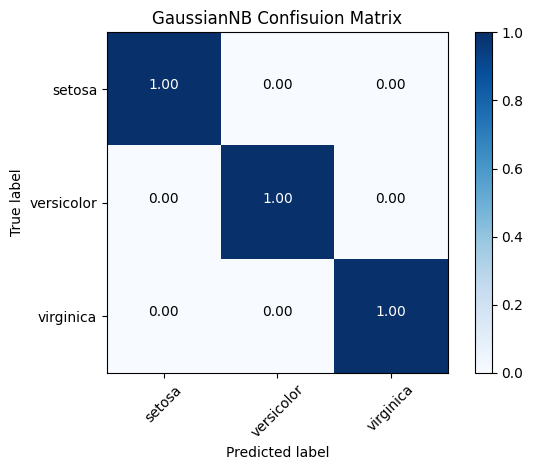

In [18]:
cnf_matrix_gnb = confusion_matrix(y_test, pred_gnb)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_gnb, classes=class_names, normalize=True, title='GaussianNB Confisuion Matrix')

plt.show()

Decision Tree Classifier

In [19]:
# Fitting

clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

clf_tree.fit(X_traning, y_training)

pred_tree = clf_tree.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, pred_tree, normalize=True))
print("Recall Score:", recall_score(y_test, pred_tree, average='micro'))
print("f1 Score:", f1_score(y_test, pred_tree, average='micro'))


Decision Tree Classifier Accuracy: 1.0
Recall Score: 1.0
f1 Score: 1.0


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


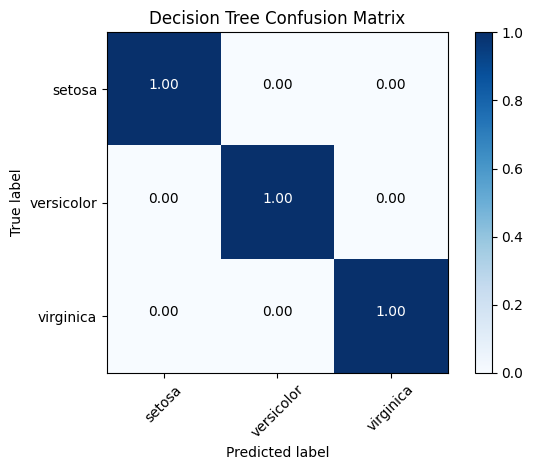

In [20]:
cnf_matrix_tree = confusion_matrix(y_test, pred_tree)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_tree, classes=class_names, normalize=True, title='Decision Tree Confusion Matrix')

plt.show()

kNN

In [21]:
clf_neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh.fit(X_traning, y_training)

pred_neigh = clf_neigh.predict(X_test)

print("KNN Classifier Accuracy:", accuracy_score(y_test, pred_neigh, normalize=True))
print("Recall Score:", recall_score(y_test, pred_neigh, average='micro'))
print("f1 Score:", f1_score(y_test, pred_neigh, average='micro'))

KNN Classifier Accuracy: 1.0
Recall Score: 1.0
f1 Score: 1.0


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


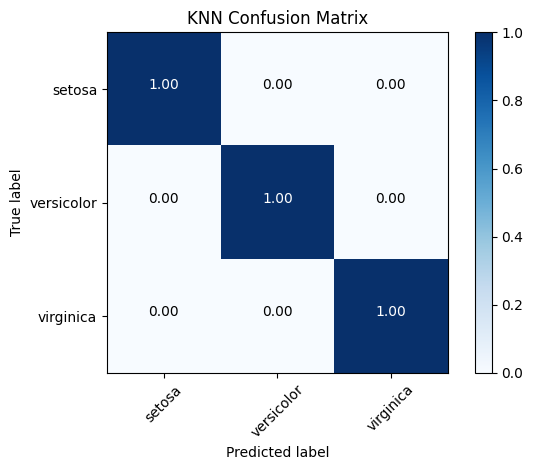

In [22]:
cnf_matrix_neigh = confusion_matrix(y_test, pred_neigh)
np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix_neigh, classes=class_names, normalize=True, title='KNN Confusion Matrix')
plt.show()

Neural Network (MLPClassifier)

In [23]:
clf_neuron = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000, solver='lbfgs')

clf_neuron.fit(X_traning, y_training)

pred_neuron = clf_neuron.predict(X_test)
print("Neural Network Classifier Accuracy:", accuracy_score(y_test, pred_neuron, normalize=True))
print("Recall Score:", recall_score(y_test, pred_neuron, average='micro'))
print("f1 Score:", f1_score(y_test, pred_neuron, average='micro'))

Neural Network Classifier Accuracy: 1.0
Recall Score: 1.0
f1 Score: 1.0


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


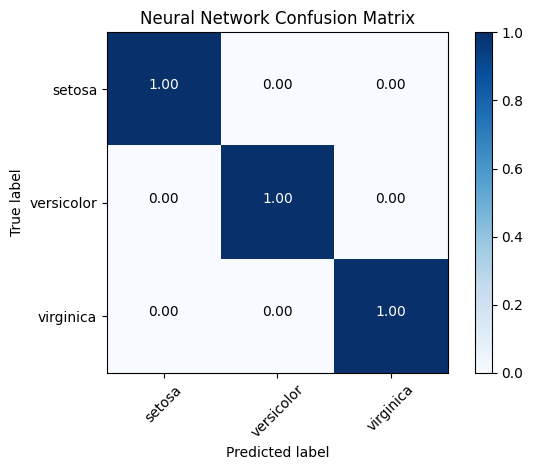

In [24]:
cnf_matrix_neuron = confusion_matrix(y_test, pred_neuron)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_neuron, classes=class_names, normalize=True, title='Neural Network Confusion Matrix')
plt.show()

## 3. Cross-validation

In [25]:
# Splitting Data for Cross-validation
X = iris.data
y = iris.target
kf = KFold(n_splits=10)
print(kf.get_n_splits())

10


In [26]:
for train_index, test_index in kf.split(X):
    X_traning, X_test = X[train_index], X[test_index]
    y_training, y_test = y[train_index], y[test_index]

Naive Bayes Classifier

In [27]:
# Gaussian Naive Bayes Classifier
clf_gnb = GaussianNB()
clf_gnb.fit(X_traning, y_training)

gnb_cv_score = cross_val_score(clf_gnb, X_traning, y_training, cv=10)
print("Cross-validated score for GaussianNB:", gnb_cv_score)

pred_gnb = cross_val_predict(clf_gnb, X_test, y_test, cv=10)
print("Accuracy Score for GaussianNB with cross-validation:", accuracy_score(y_test, pred_gnb, normalize=True))

Cross-validated score for GaussianNB: [0.93 0.93 1.   1.   0.86 0.92 1.   1.   1.   0.85]
Accuracy Score for GaussianNB with cross-validation: 1.0


Decision Tree Classifier

In [28]:
# Fitting Decision Tree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)

clf_tree.fit(X_traning, y_training)

tree_cv_score = cross_val_score(clf_tree, X_traning, y_training, cv=10)
print("Cross-validated score for Decision Tree:", tree_cv_score)

pred_tree = cross_val_predict(clf_tree, X_test, y_test, cv=10)
print("Accuracy Score for Decision Tree with cross-validation:", accuracy_score(y_test, pred_tree, normalize=True))

Cross-validated score for Decision Tree: [0.93 0.93 1.   1.   0.86 0.85 0.92 0.92 0.92 0.85]
Accuracy Score for Decision Tree with cross-validation: 1.0


kNN

In [29]:
clf_neigh = KNeighborsClassifier(n_neighbors=3)

clf_neigh.fit(X_traning, y_training)

knn_cv_score = cross_val_score(clf_neigh, X_traning, y_training, cv=10)
print("Cross-validated score for KNN:", knn_cv_score)

pred_knn = cross_val_predict(clf_knn, X_test, y_test, cv=10)
print("Accuracy Score for KNN with cross-validation:", accuracy_score(y_test, pred_knn, normalize=True))

Cross-validated score for KNN: [1.   0.93 1.   1.   0.86 1.   0.92 0.92 1.   0.92]
Accuracy Score for KNN with cross-validation: 1.0


Neural Network (MLPClassifier)

In [30]:
clf_neuron = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000, solver='lbfgs')

clf_neuron.fit(X_traning, y_training)

neuron_cv_score = cross_val_score(clf_neuron, X_traning, y_training, cv=10)
print("Cross-validated score for Neural Network:", neuron_cv_score)

pred_neuron = cross_val_predict(clf_neuron, X_test, y_test, cv=10)
print("Accuracy Score for Neural Network with cross-validation:", accuracy_score(y_test, pred_neuron, normalize=True))

Cross-validated score for Neural Network: [1.   0.93 1.   1.   0.93 1.   0.92 1.   1.   0.85]
Accuracy Score for Neural Network with cross-validation: 1.0


# Save the Model

Save the model using pickle

In [31]:
models = []

models.append(clf_gnb)
models.append(clf_tree)
models.append(clf_neigh)
models.append(clf_neuron)

plk_filename = "iris_models.pkl"
with open(plk_filename, 'wb') as file:
    for model in models:
        pickle.dump(models, file)

# Load the model

In [32]:
models = []
plk_filename = "iris_models.pkl"
with open(plk_filename, 'rb') as file:
    while True:
        try:
            models.append(pickle.load(file))
        except EOFError:
            break

In [33]:
loaded_gnb = models[0][0]
loaded_tree = models[1][0]
loaded_neigh = models[2][0]
loaded_neuron = models[3][0]

# Add an instance

In [34]:
# Get extreme values
max_v = np.amax(X, axis=0)
min_v = np.amin(X, axis=0)

new_instance = np.array([
    round(rd.uniform(min_v[0], max_v[0]), 1),
    round(rd.uniform(min_v[1], max_v[1]), 1),
    round(rd.uniform(min_v[2], max_v[2]), 1),
    round(rd.uniform(min_v[3], max_v[3]), 1)
    ]).reshape(1, -1)

print("New instance:", new_instance)

New instance: [[6.6 2.4 2.7 0.9]]


Predict the new instance

In [35]:
new_instance_predict_gnb = loaded_gnb.predict(new_instance)
print(
    "New instance prediction using native bayes:",
    class_names[new_instance_predict_gnb[0]],
)

New instance prediction using native bayes: versicolor


In [36]:
new_instance_predict_tree = loaded_tree.predict(new_instance)
print(
    "New instance prediction using decision tree:",
    class_names[new_instance_predict_tree[0]],
)

New instance prediction using decision tree: versicolor


In [37]:
new_instance_predict_neigh = loaded_neigh.predict(new_instance)

print(
    "New instance prediction using KNN:",
    class_names[new_instance_predict_neigh[0]],
)

New instance prediction using KNN: versicolor


In [38]:
new_instance_predict_neuron = loaded_neuron.predict(new_instance)
print(
    "New instance prediction using neural network:",
    iris.target_names[new_instance_predict_neuron[0]],
)

New instance prediction using neural network: versicolor
